In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

df = pd.read_csv('Emotion_final.csv')
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [2]:
X = df.Text
Y = df.Emotion
print(X.shape)

(21459,)


# CountVectirizer 

In [3]:
# Vectorizer
vec = CountVectorizer()
X_vec = vec.fit_transform(X)


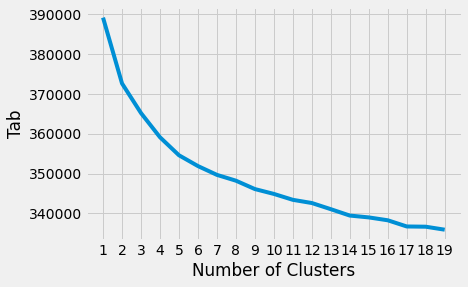

In [4]:
#coude 

tab = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_vec)
    tab.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), tab)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Tab")
plt.show()

In [12]:
#La détermination du point de coude dans la courbe
point_coude = KneeLocator(range(1, 20), tab, curve="convex", direction="decreasing")

print("point_coude = ",point_coude.elbow)

point_coude =  5


In [5]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_vec)
    score = silhouette_score(X_vec, kmeans.labels_)
    silhouette_coefficients.append(score)

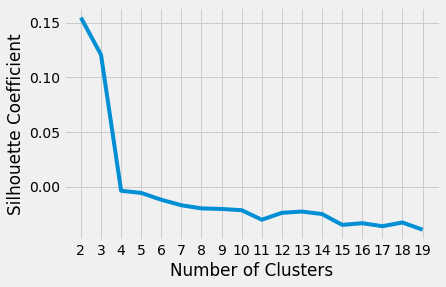

In [6]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

ici on obtient 4

# Kmeans

In [7]:
model = KMeans(n_clusters=6)
model.fit(X_vec)
y_pred= model.predict(X_vec)

In [16]:
from sklearn import metrics
import numpy as np

Y_nbre = df.Emotion.replace(['happy','sadness','anger','fear','love','surprise'],[1,2,3,4,5,6])
Y_nbre = np.array(Y_nbre)
print(type(Y_nbre))

inertia_simple = model.inertia_
ARI_simple = metrics.adjusted_rand_score(Y, y_pred)
NMI_simple = metrics.normalized_mutual_info_score(Y,y_pred)
AMI_simple = metrics.adjusted_mutual_info_score(Y,y_pred)
Accuracy_simple = metrics.accuracy_score(Y_nbre, y_pred)
silhouette_score_simple = metrics.silhouette_score(X_vec,y_pred,metric="euclidean")

print("inertia = ", inertia_simple)
print("ARI = ",ARI_simple)
print("NMI = ",NMI_simple)
print("AMI = ",AMI_simple)
print("Accuracy = ",Accuracy_simple)
print("silouhette score = ",silhouette_score_simple)


<class 'numpy.ndarray'>
inertia =  352178.1459200389
ARI =  0.0028494132479228817
NMI =  0.0018770162827115781
AMI =  0.0015148145624646167
Accuracy =  0.18654177734283983
silouhette score =  -0.008187739229587137


In [17]:
ar = np.array([[inertia_simple, ARI_simple, NMI_simple, AMI_simple, Accuracy_simple, silhouette_score_simple]])
data = pd.DataFrame(ar, index = ['K-means'], columns = ['inertia', 'ARI', 'NMI', 'AMI', 'Accuracy', 'Silhouette']) 
data

,inertia,ARI,NMI,AMI,Accuracy,Silhouette
K-means,352178.14592,0.002849,0.001877,0.001515,0.186542,-0.008188


# Kmeans + StandarScaler

In [12]:
scaler = StandardScaler(with_mean=False)# il faut mettre l'argument "with_mean=False" dans StandardScaler
X_scaler = scaler.fit_transform(X_vec)
X_scaler

<21459x19211 sparse matrix of type '<class 'numpy.float64'>'
	with 334038 stored elements in Compressed Sparse Row format>

In [13]:
model_1 = KMeans(init="k-means++", n_clusters=6)
model_1.fit(X_scaler)
y1_pred = model_1.predict(X_scaler)

In [18]:
from sklearn import metrics
import numpy as np

Y_nbre = df.Emotion.replace(['happy','sadness','anger','fear','love','surprise'],[1,2,3,4,5,6])
Y_nbre = np.array(Y_nbre)
#print(type(Y_nbre))

inertia_scaler = model_1.inertia_
ARI_scaler = metrics.adjusted_rand_score(Y, y1_pred)
NMI_scaler = metrics.normalized_mutual_info_score(Y,y1_pred)
AMI_scaler = metrics.adjusted_mutual_info_score(Y,y1_pred)
Accuracy_scaler = metrics.accuracy_score(Y_nbre, y1_pred)
silhouette_score_scaler = metrics.silhouette_score(X_vec,y1_pred,metric="euclidean")

print("inertia = ", inertia_scaler)
print("ARI = ",ARI_scaler)
print("NMI = ",NMI_scaler)
print("AMI = ",AMI_scaler)
print("Accuracy = ",Accuracy_scaler)
print("silouhette score = ",silhouette_score_scaler)

inertia =  411569672.39861614
ARI =  -3.74117094625266e-05
NMI =  0.0006242714007439343
AMI =  6.731073825662341e-05
Accuracy =  0.2917656927163428
silouhette score =  -0.020569660066300437


In [19]:
ar1 = np.array([[inertia_scaler, ARI_scaler, NMI_scaler, AMI_scaler, Accuracy_scaler, silhouette_score_scaler]])
data1 = pd.DataFrame(ar1, index = ['K-means + StandardScaler'], columns = ['inertia', 'ARI', 'NMI', 'AMI', 'Accuracy', 'Silhouette']) 
data1

,inertia,ARI,NMI,AMI,Accuracy,Silhouette
K-means + StandardScaler,4.115697e+08,-0.000037,0.000624,0.000067,0.291766,-0.02057


# K-means + PCA

## on utilise le TruncatedSVD à la place du PCA car il ne gère pas les matrices creuses (sparses) 

In [20]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# on utilise le TruncatedSVD à la place du PCA car il ne gère pas les matrices creuses (sparses) 
clf = TruncatedSVD(100)
X_pca = clf.fit_transform(X_vec)

#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(X_vec)
model_2 = KMeans(init="k-means++", n_clusters=6, n_init=4)
y2_pred = model_2.fit_predict(X_pca)

In [21]:
from sklearn import metrics
import numpy as np

Y_nbre = df.Emotion.replace(['happy','sadness','anger','fear','love','surprise'],[1,2,3,4,5,6])
Y_nbre = np.array(Y_nbre)
#print(type(Y_nbre))

inertia_PCA = model_2.inertia_
ARI_PCA = metrics.adjusted_rand_score(Y, y2_pred)
NMI_PCA = metrics.normalized_mutual_info_score(Y,y2_pred)
AMI_PCA = metrics.adjusted_mutual_info_score(Y,y2_pred)
Accuracy_PCA = metrics.accuracy_score(Y_nbre, y2_pred)
silhouette_score_PCA = metrics.silhouette_score(X_vec,y2_pred)

print("inertia = ", inertia_PCA)
print("ARI = ",ARI_PCA)
print("NMI = ",NMI_PCA)
print("AMI = ",AMI_PCA)
print("Accuracy = ",Accuracy_PCA)
print("silouhette score = ",silhouette_score_PCA)

inertia =  182885.56800462637
ARI =  0.005155675667790839
NMI =  0.0035112446406252128
AMI =  0.003149297770157647
Accuracy =  0.2198611305279836
silouhette score =  -0.010329273160833584


In [22]:
ar2 = np.array([[inertia_PCA, ARI_PCA, NMI_PCA, AMI_PCA, Accuracy_PCA, silhouette_score_PCA]])
data2 = pd.DataFrame(ar2, index = ['K-means + PCA(TruncatedSVD)'], columns = ['inertia', 'ARI', 'NMI', 'AMI', 'Accuracy', 'Silhouette']) 
data2

,inertia,ARI,NMI,AMI,Accuracy,Silhouette
K-means + PCA(TruncatedSVD),182885.568005,0.005156,0.003511,0.003149,0.219861,-0.010329


In [23]:
PCA_components = pd.DataFrame(X_pca)

Text(0, 0.5, 'PCA 2')

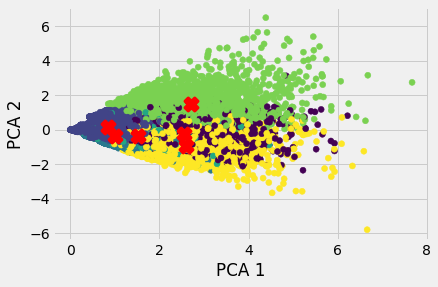

In [25]:
#colormap = np.array(["Red","orange","gree","blue","yellow","purple","pink","Magenda","fuchsia","grey"])
plt.scatter(PCA_components[0], PCA_components[1], c=y2_pred)
plt.scatter(model_2.cluster_centers_[:,0], model_2.cluster_centers_[:,1], marker = "X",linewidths=3,s=169, c="r")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Text(0, 0.5, 'PCA 2')

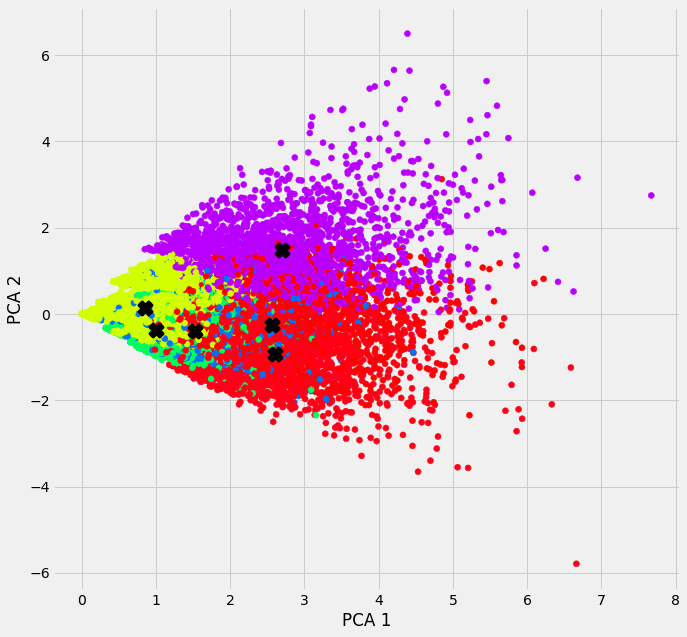

In [26]:
import numpy as np

#colormap = np.array(["Red","orange","gree","blue","yellow","purple","pink","Magenda","fuchsia","grey"])
cmap = plt.cm.get_cmap("hsv", model_2.cluster_centers_.shape[0])
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colormap = [cmap(i) for i in model_2.labels_]
plt.scatter(PCA_components[0], PCA_components[1], c=colormap)
plt.scatter(model_2.cluster_centers_[:,0], model_2.cluster_centers_[:,1], marker = "X",linewidths=3,s=169, c="black")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# K-means + kernelPCA

## j'ai volu utiliser le kernel PCA à la place du PCA car il ne gère pas les matrices creuses mais il a fait planter le noyau c'est pour cela que je ne l'ai pas utilisé

# k-MEANS + StandardScaler + PCA(TruncatedSVD)

In [30]:
from sklearn.decomposition import TruncatedSVD

X_std = StandardScaler(with_mean=False).fit_transform(X_vec)

# on utilise le TruncatedSVD à la place du PCA car il ne gère pas les matrices creuses (sparses) 
clf = TruncatedSVD(100)
X_pca_scaler = clf.fit_transform(X_std)


#pca_scaler = PCA(n_components=20)
#principalComponents = pca_scaler.fit_transform(X_std)
model_3 = KMeans(init="k-means++", n_clusters=6, n_init=4)
y3_pred= model_3.fit_predict(X_pca_scaler)

In [31]:
from sklearn import metrics
import numpy as np

Y_nbre = df.Emotion.replace(['happy','sadness','anger','fear','love','surprise'],[1,2,3,4,5,6])
Y_nbre = np.array(Y_nbre)
#print(type(Y_nbre))

inertia_PCA_scaler = model_3.inertia_
ARI_PCA_scaler = metrics.adjusted_rand_score(Y, y3_pred)
NMI_PCA_scaler = metrics.normalized_mutual_info_score(Y,y3_pred)
AMI_PCA_scaler = metrics.adjusted_mutual_info_score(Y,y3_pred)
Accuracy_PCA_scaler = metrics.accuracy_score(Y_nbre, y3_pred)
silhouette_score_PCA_scaler = metrics.silhouette_score(X_vec,y3_pred)

print("inertia = ", inertia_PCA_scaler)
print("ARI = ",ARI_PCA_scaler)
print("NMI = ",NMI_PCA_scaler)
print("AMI = ",AMI_PCA_scaler)
print("Accuracy = ",Accuracy_PCA_scaler)
print("silouhette score = ",silhouette_score_PCA_scaler)

inertia =  15854467.689782398
ARI =  6.511320210547412e-06
NMI =  0.0004768214968130832
AMI =  1.1537980544210848e-05
Accuracy =  9.320098793047206e-05
silouhette score =  0.1357075062703452


In [32]:
ar3 = np.array([[inertia_PCA_scaler, ARI_PCA_scaler, NMI_PCA_scaler, AMI_PCA_scaler, Accuracy_PCA_scaler, silhouette_score_PCA_scaler]])
data3 = pd.DataFrame(ar3, index = ['K-means + StandardScaler + PCA(TruncatedSVD)'], columns = ['inertia', 'ARI', 'NMI', 'AMI', 'Accuracy', 'Silhouette']) 
data3

,inertia,ARI,NMI,AMI,Accuracy,Silhouette
K-means + StandardScaler + PCA(TruncatedSVD),1.585447e+07,0.000007,0.000477,0.000012,0.000093,0.135708


Text(0, 0.5, 'PCA 2')

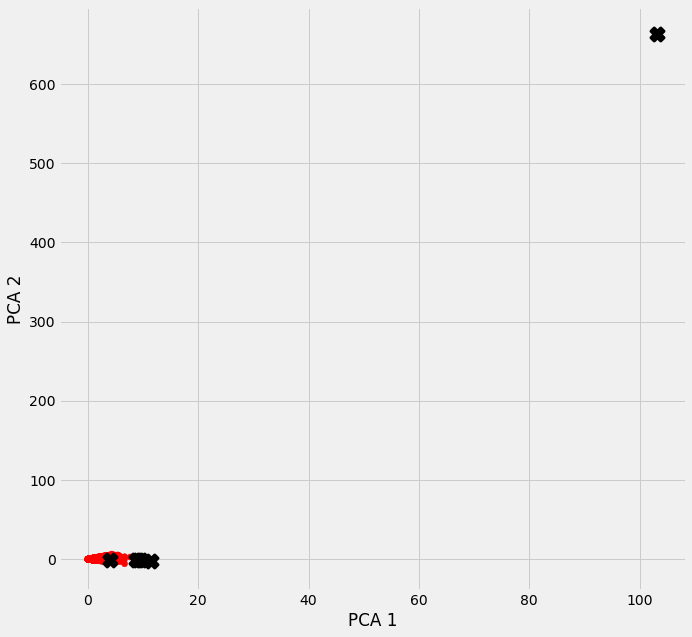

In [34]:
import numpy as np

#colormap = np.array(["Red","orange","gree","blue","yellow","purple","pink","Magenda","fuchsia","grey"])
cmap = plt.cm.get_cmap("hsv", model_3.cluster_centers_.shape[0])
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colormap = [cmap(i) for i in model_3.labels_]
plt.scatter(PCA_components[0], PCA_components[1], c=colormap)
plt.scatter(model_3.cluster_centers_[:,0], model_3.cluster_centers_[:,1], marker = "X",linewidths=3,s=169, c="black")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Comparaison des resultats des 4 modèles 

In [33]:
DATA = pd.concat([data, data1, data2, data3])
DATA 

,inertia,ARI,NMI,AMI,Accuracy,Silhouette
K-means,3.521781e+05,0.002849,0.001877,0.001515,0.186542,-0.008188
K-means + StandardScaler,4.115697e+08,-0.000037,0.000624,0.000067,0.291766,-0.020570
K-means + PCA(TruncatedSVD),1.828856e+05,0.005156,0.003511,0.003149,0.219861,-0.010329
K-means + StandardScaler + PCA(TruncatedSVD),1.585447e+07,0.000007,0.000477,0.000012,0.000093,0.135708
